#**STEP 1 : PERKENALAN**

**MILESTONES 1**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Artificial Neural Network**

**Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :**

* Mampu memahami konsep Artificial Neural Network.
* Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
* Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
* Mampu menganalisis dan menjelaskan layer yang dibuat.

## **STEP 2 : IMPORTING LIBRARY**

In [1]:
pip install six

In [2]:
pip install --upgrade sklearn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# oversampling
from imblearn.over_sampling import SMOTE

%matplotlib inline

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Tensorflow adalah Python library open source untuk komputasi numerik yang dapat mempercepat dan memudahkan dalam menggunakan machine learning.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

**Formating**

In [4]:
# Memudahkan untuk bisa melihat semua kolom
pd.set_option('display.max_columns', 100)

# Set nilai random agar nilainya konstan
np.random.seed(77)

**Proses Read dataset**

In [5]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## **STEP 4 : DATA EXPLORATION**

**Data memiliki jumlah baris 7043 dan jumlah kolom 21**

In [6]:
data.shape

(7043, 21)

**Melihat isi 10 data pertama**

In [7]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Melihat 10 data Middle**

In [8]:
data[3500:3510]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3500,5443-SCMKX,Female,0,Yes,No,58,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.30,5610.15,No
3501,8295-KMENE,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Mailed check,76.45,4519.5,No
3502,6738-ISCBM,Male,0,No,No,44,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,54.00,2440.25,No
3503,9821-BESNZ,Male,0,No,No,66,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.25,6860.6,No
3504,3678-MNGZX,Male,0,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.7,No
3505,1335-NTIUC,Male,0,No,No,9,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.95,190.25,No
3506,2916-BQZLN,Male,0,No,No,19,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.75,1651.95,No
3507,4558-CGYCZ,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,78.3,No
3508,2368-GAKKQ,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,7939.25,No
3509,8710-YGLWG,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.90,44.9,No


**Melihat isi 10 data terakhir**

In [9]:
data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Melihat nama kolom pada data**

In [10]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**About This Dataset :**

**Source :** https://www.kaggle.com/blastchar/telco-customer-churn

**Context :**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content :**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration :**

To explore this type of models and learn more about the subject.

**Melihat value kolom Target yaitu kolom Churn**

In [11]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Melihat nilai keseluruhan data dari masing-masing kolom**

In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [14]:
dtc = data.copy()

**Melihat jumlah data yang missing values pada semua kolom**

In [15]:
dtc.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
dtc.isnull().sum().any()

False

In [17]:
dtc.duplicated().sum()

0

In [18]:
dtc.duplicated().any()

False

**Tidak ada data yang missing values maupun data yang duplikat**

**Menghapus kolom customerID karena tidak terlalu dibutuhkan**

In [19]:
dtc = dtc.drop(columns = ['customerID'])

**Mengubah tipe data kolom TotalCharges yang sebelumnya object menjadi float**

In [20]:
dtc.drop(dtc[dtc['TotalCharges'] == ' '].index, inplace = True)

In [21]:
dtc['TotalCharges'] = dtc['TotalCharges'].astype('float64')

In [22]:
dtc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
dtc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Melihat nilai unique dari semua kolom pada dataset.**

In [24]:
unique_value = dtc.columns
for column in unique_value:
    print(f"{'Columns : ' + column} \n {dtc[column].unique()} \n")

Columns : gender 
 ['Female' 'Male'] 

Columns : SeniorCitizen 
 [0 1] 

Columns : Partner 
 ['Yes' 'No'] 

Columns : Dependents 
 ['No' 'Yes'] 

Columns : tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

Columns : PhoneService 
 ['No' 'Yes'] 

Columns : MultipleLines 
 ['No phone service' 'No' 'Yes'] 

Columns : InternetService 
 ['DSL' 'Fiber optic' 'No'] 

Columns : OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 

Columns : OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

Columns : DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

Columns : TechSupport 
 ['No' 'Yes' 'No internet service'] 

Columns : StreamingTV 
 ['No' 'Yes' 'No internet service'] 

Columns : StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Columns : Contract 
 ['Month-to-month' 'One year' 'Two year'] 

Columns : Pap

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

In [25]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

In [26]:
# for numerical and categorical columns
num_column = list(dtc.select_dtypes("number").columns)
cat_column = list(dtc.select_dtypes(object).drop(columns = ["Churn"]).columns)

In [27]:
dtc[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [28]:
dtc[cat_column].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


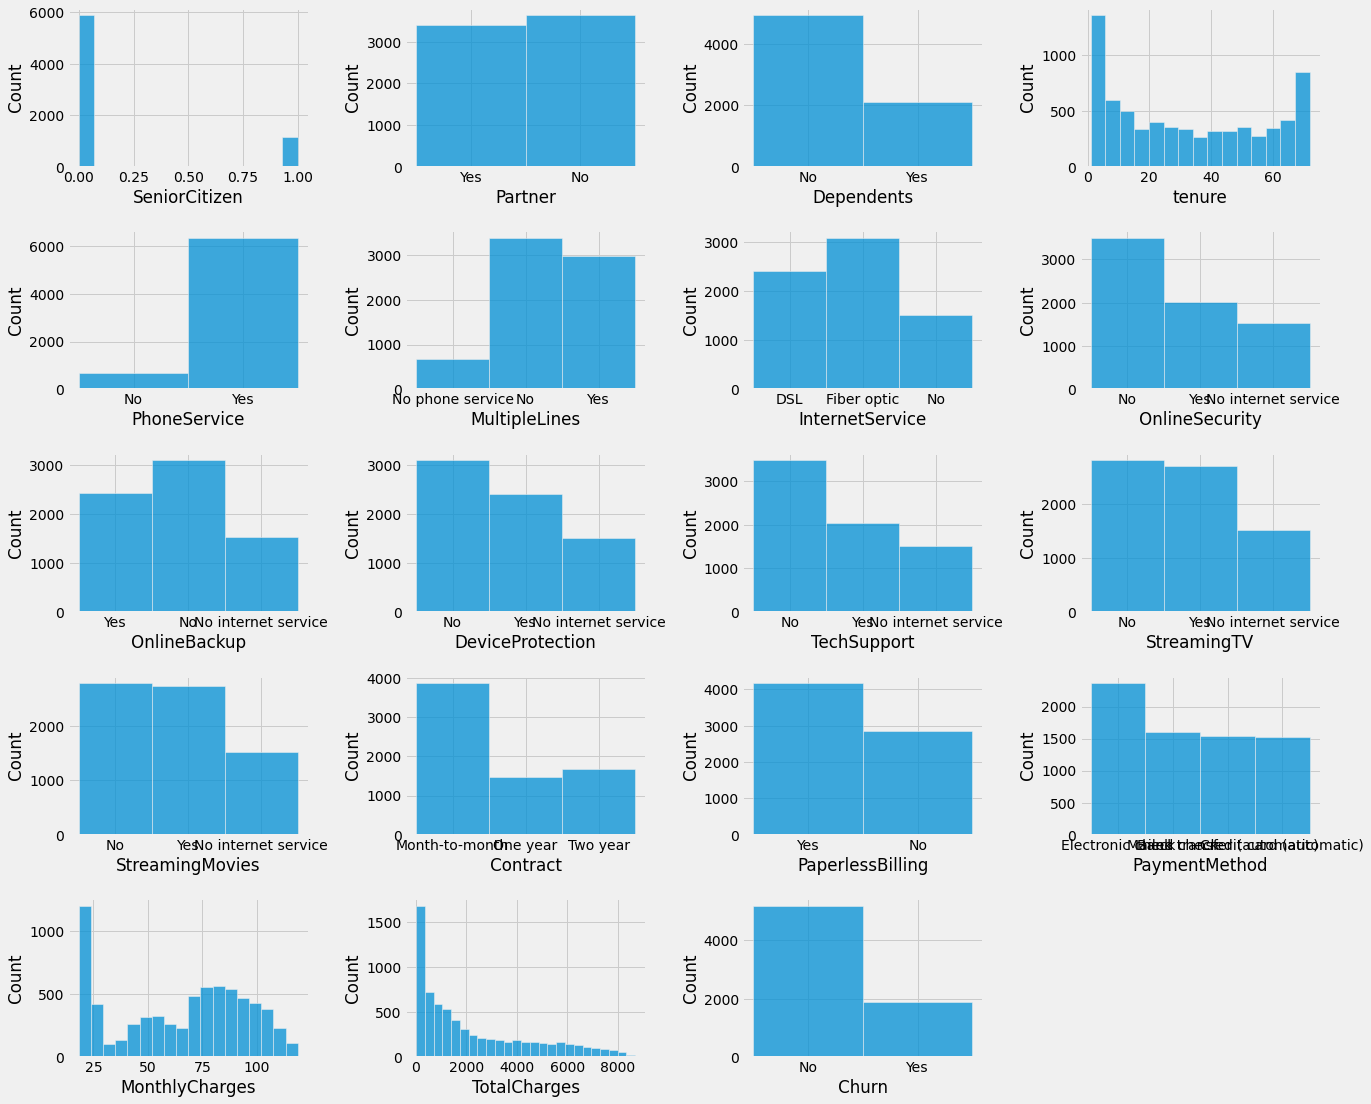

In [29]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(dtc.columns)):
    ax = fig.add_subplot(5, 4, i)
    sns.histplot(dtc[dtc.columns[i]])
    plt.xlabel(dtc.columns[i])

**Dari plot di atas, dapat disimpulkan bawha distribusi dataset secara keseluruhan. Untuk data numerik, rata-rata berbentuk bimodal dan multimodal distribution. Hanya kolom 'Total Charges' saja yang skewed ke kanan, hal ini wajar karena ada saja customer yang memiliki total tagihan yang tinggi dikarenakan jumlah service yang dipakai cukup banyak atau hal lainnya.**

**Melihat Value count pada dataset untuk masing-masing kolom untuk dianalisa lebih lanjut**

In [30]:
value_count = dtc.columns
for column in value_count:
    print(f"{'Columns : ' + column} \n{dtc[column].value_counts()} \n")

Columns : gender 
Male      3549
Female    3483
Name: gender, dtype: int64 

Columns : SeniorCitizen 
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Columns : Partner 
No     3639
Yes    3393
Name: Partner, dtype: int64 

Columns : Dependents 
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Columns : tenure 
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Columns : PhoneService 
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Columns : MultipleLines 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Columns : InternetService 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Columns : OnlineSecurity 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Columns : OnlineBackup 
No    

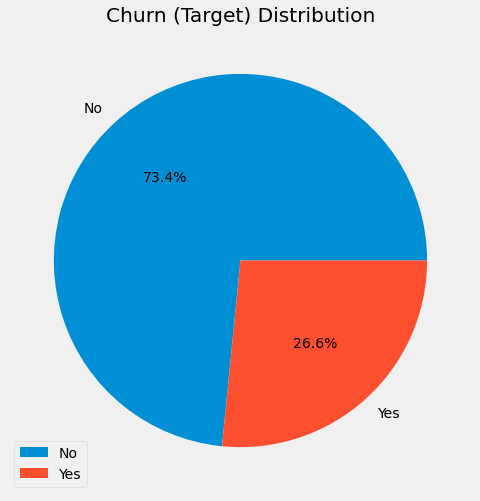

Target distribution is Imbalanced


In [31]:
explode = (0,0)
plt.figure(figsize = (10,8))
plt.pie(
    dtc['Churn'].value_counts(),
    labels=dtc['Churn'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Churn (Target) Distribution")
plt.legend(loc=3,prop={'size': 14})
plt.show()

print("Target distribution is Imbalanced")

**Distribusi target tidak seimbang**

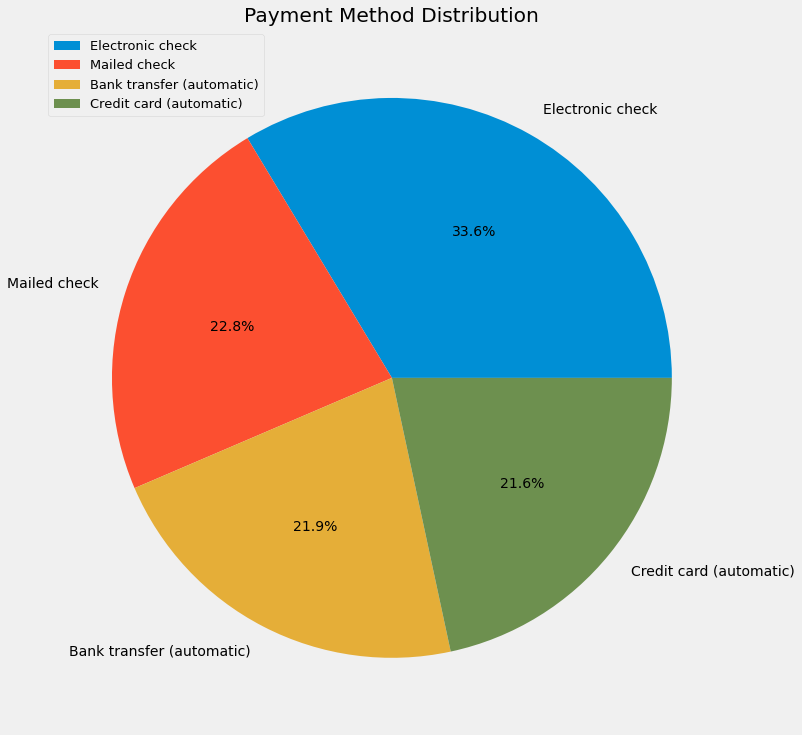

Majority of the customers use E-check


In [32]:
explode = (0, 0, 0, 0)
plt.figure(figsize = (14,12))
plt.pie(
    dtc['PaymentMethod'].value_counts(),
    labels=dtc['PaymentMethod'].value_counts().index, explode=explode,
    autopct='%1.1f%%'
)
plt.title("Payment Method Distribution")
plt.legend(loc=2,prop={'size': 13})
plt.show()

print("Majority of the customers use E-check")

**Sebagian besar pelanggan menggunakan E-check**

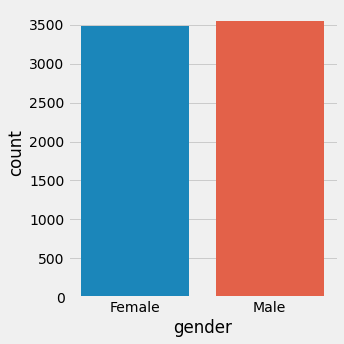

Approximately 50/50 gender ratio


In [33]:
sns.catplot(x="gender", kind="count", data=dtc)
plt.show()
print("Approximately 50/50 gender ratio")

**Sekitar 50/50 rasio gender**

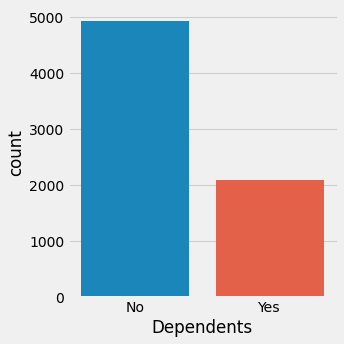

Users who have non-dependents are approximately two times more than users having dependents


In [34]:
sns.catplot(x="Dependents", kind="count", data=dtc)
plt.show()
print("Users who have non-dependents are approximately two times more than users having dependents")

**Pengguna yang memiliki non-dependen sekitar dua kali lebih banyak daripada pengguna yang memiliki tanggungan.**

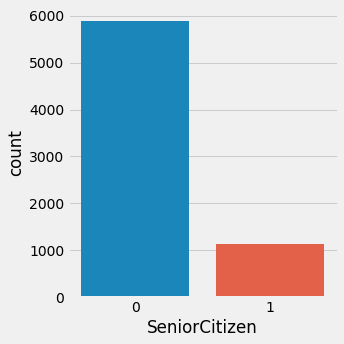

The majority of the users are not Senior Citizen


In [35]:
sns.catplot(x="SeniorCitizen", kind="count", data=dtc)
plt.show()
print("The majority of the users are not Senior Citizen")

**Sebagian besar pengguna bukan senior citizen.**

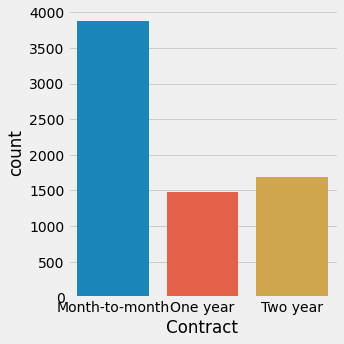

Most of the users prefer Month-to-month contract


In [36]:
sns.catplot(x="Contract", kind="count", data=dtc)
plt.show()
print("Most of the users prefer Month-to-month contract")

**Sebagian besar pengguna lebih memilih kontrak bulanan.**

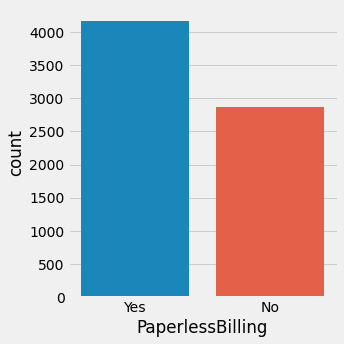

Most of the users prefer paperless billing


In [37]:
sns.catplot(x="PaperlessBilling", kind="count", data=dtc)
plt.show()
print("Most of the users prefer paperless billing")

**Sebagian besar pengguna lebih suka penagihan paperless**

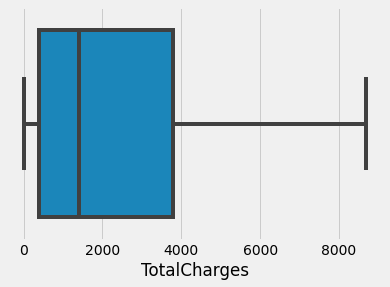

The total charges fall under 4000 for majority of the users


In [38]:
sns.boxplot(x=dtc["TotalCharges"])
plt.show()
print("The total charges fall under 4000 for majority of the users")

**Total biaya jatuh di bawah 4000 untuk sebagian besar pengguna.**

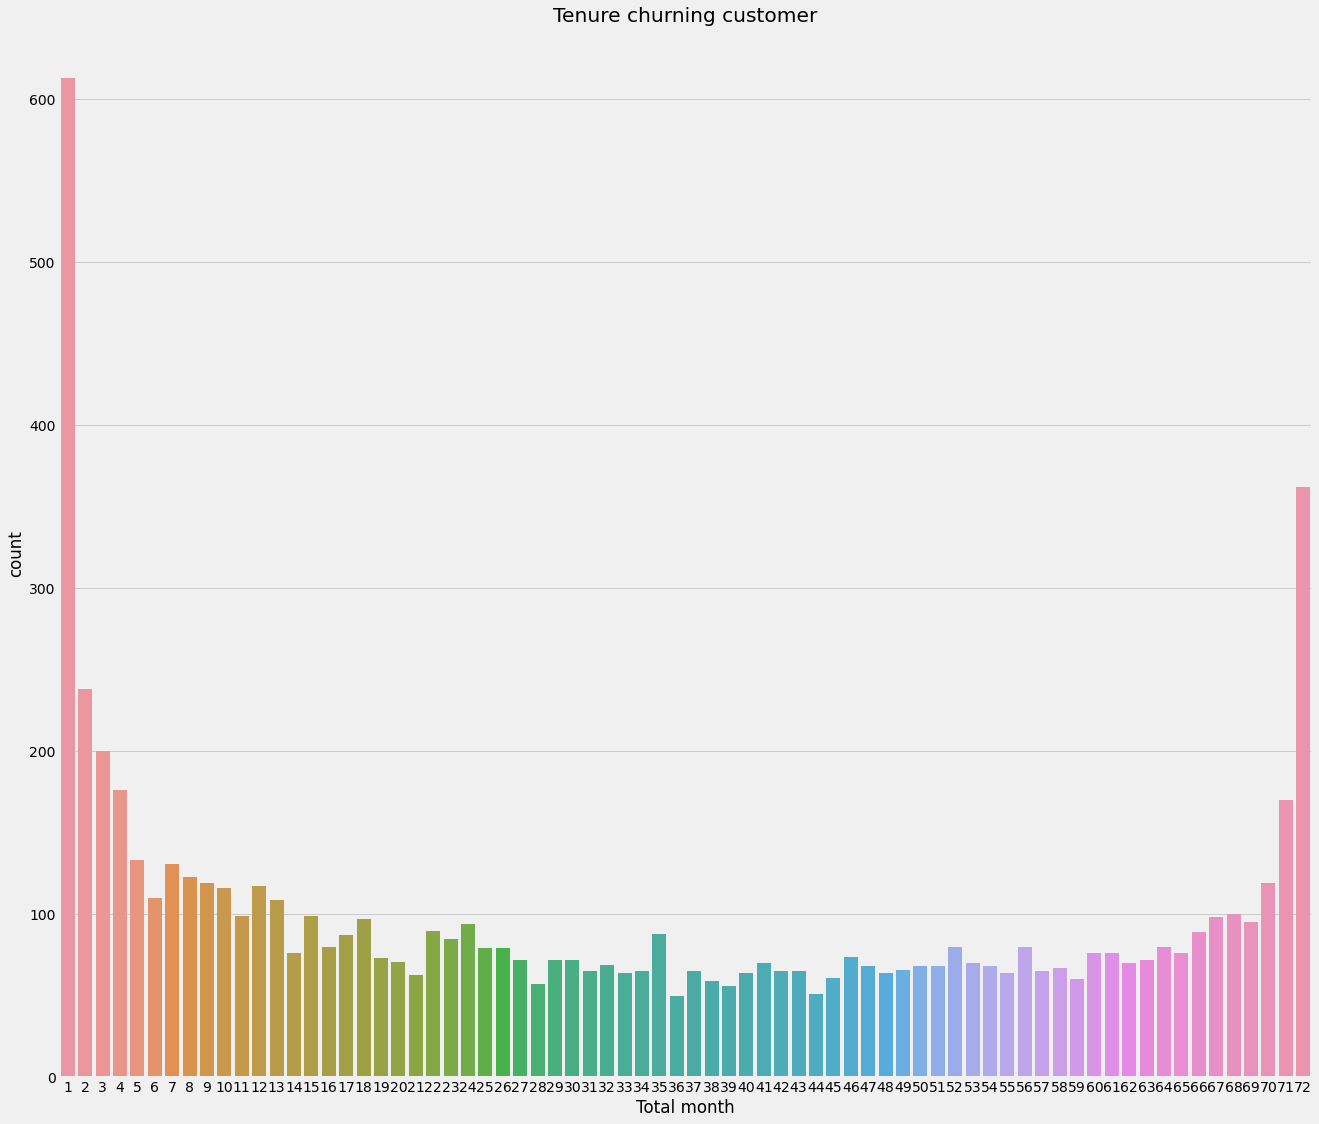

In [39]:
plt.figure(figsize=(20,18))
sns.countplot(x=dtc['tenure'], data=dtc)
plt.title('Tenure churning customer')

plt.xlabel('Total month')
plt.show()

**Di sini dapat terlihat bahwa mayoritas churning customer adalah 'Non senior citizen' atau masyarakat dengan umur dibawah 40. Dan mayoritas hanya menggunakan layanan selama 1 bulan.**

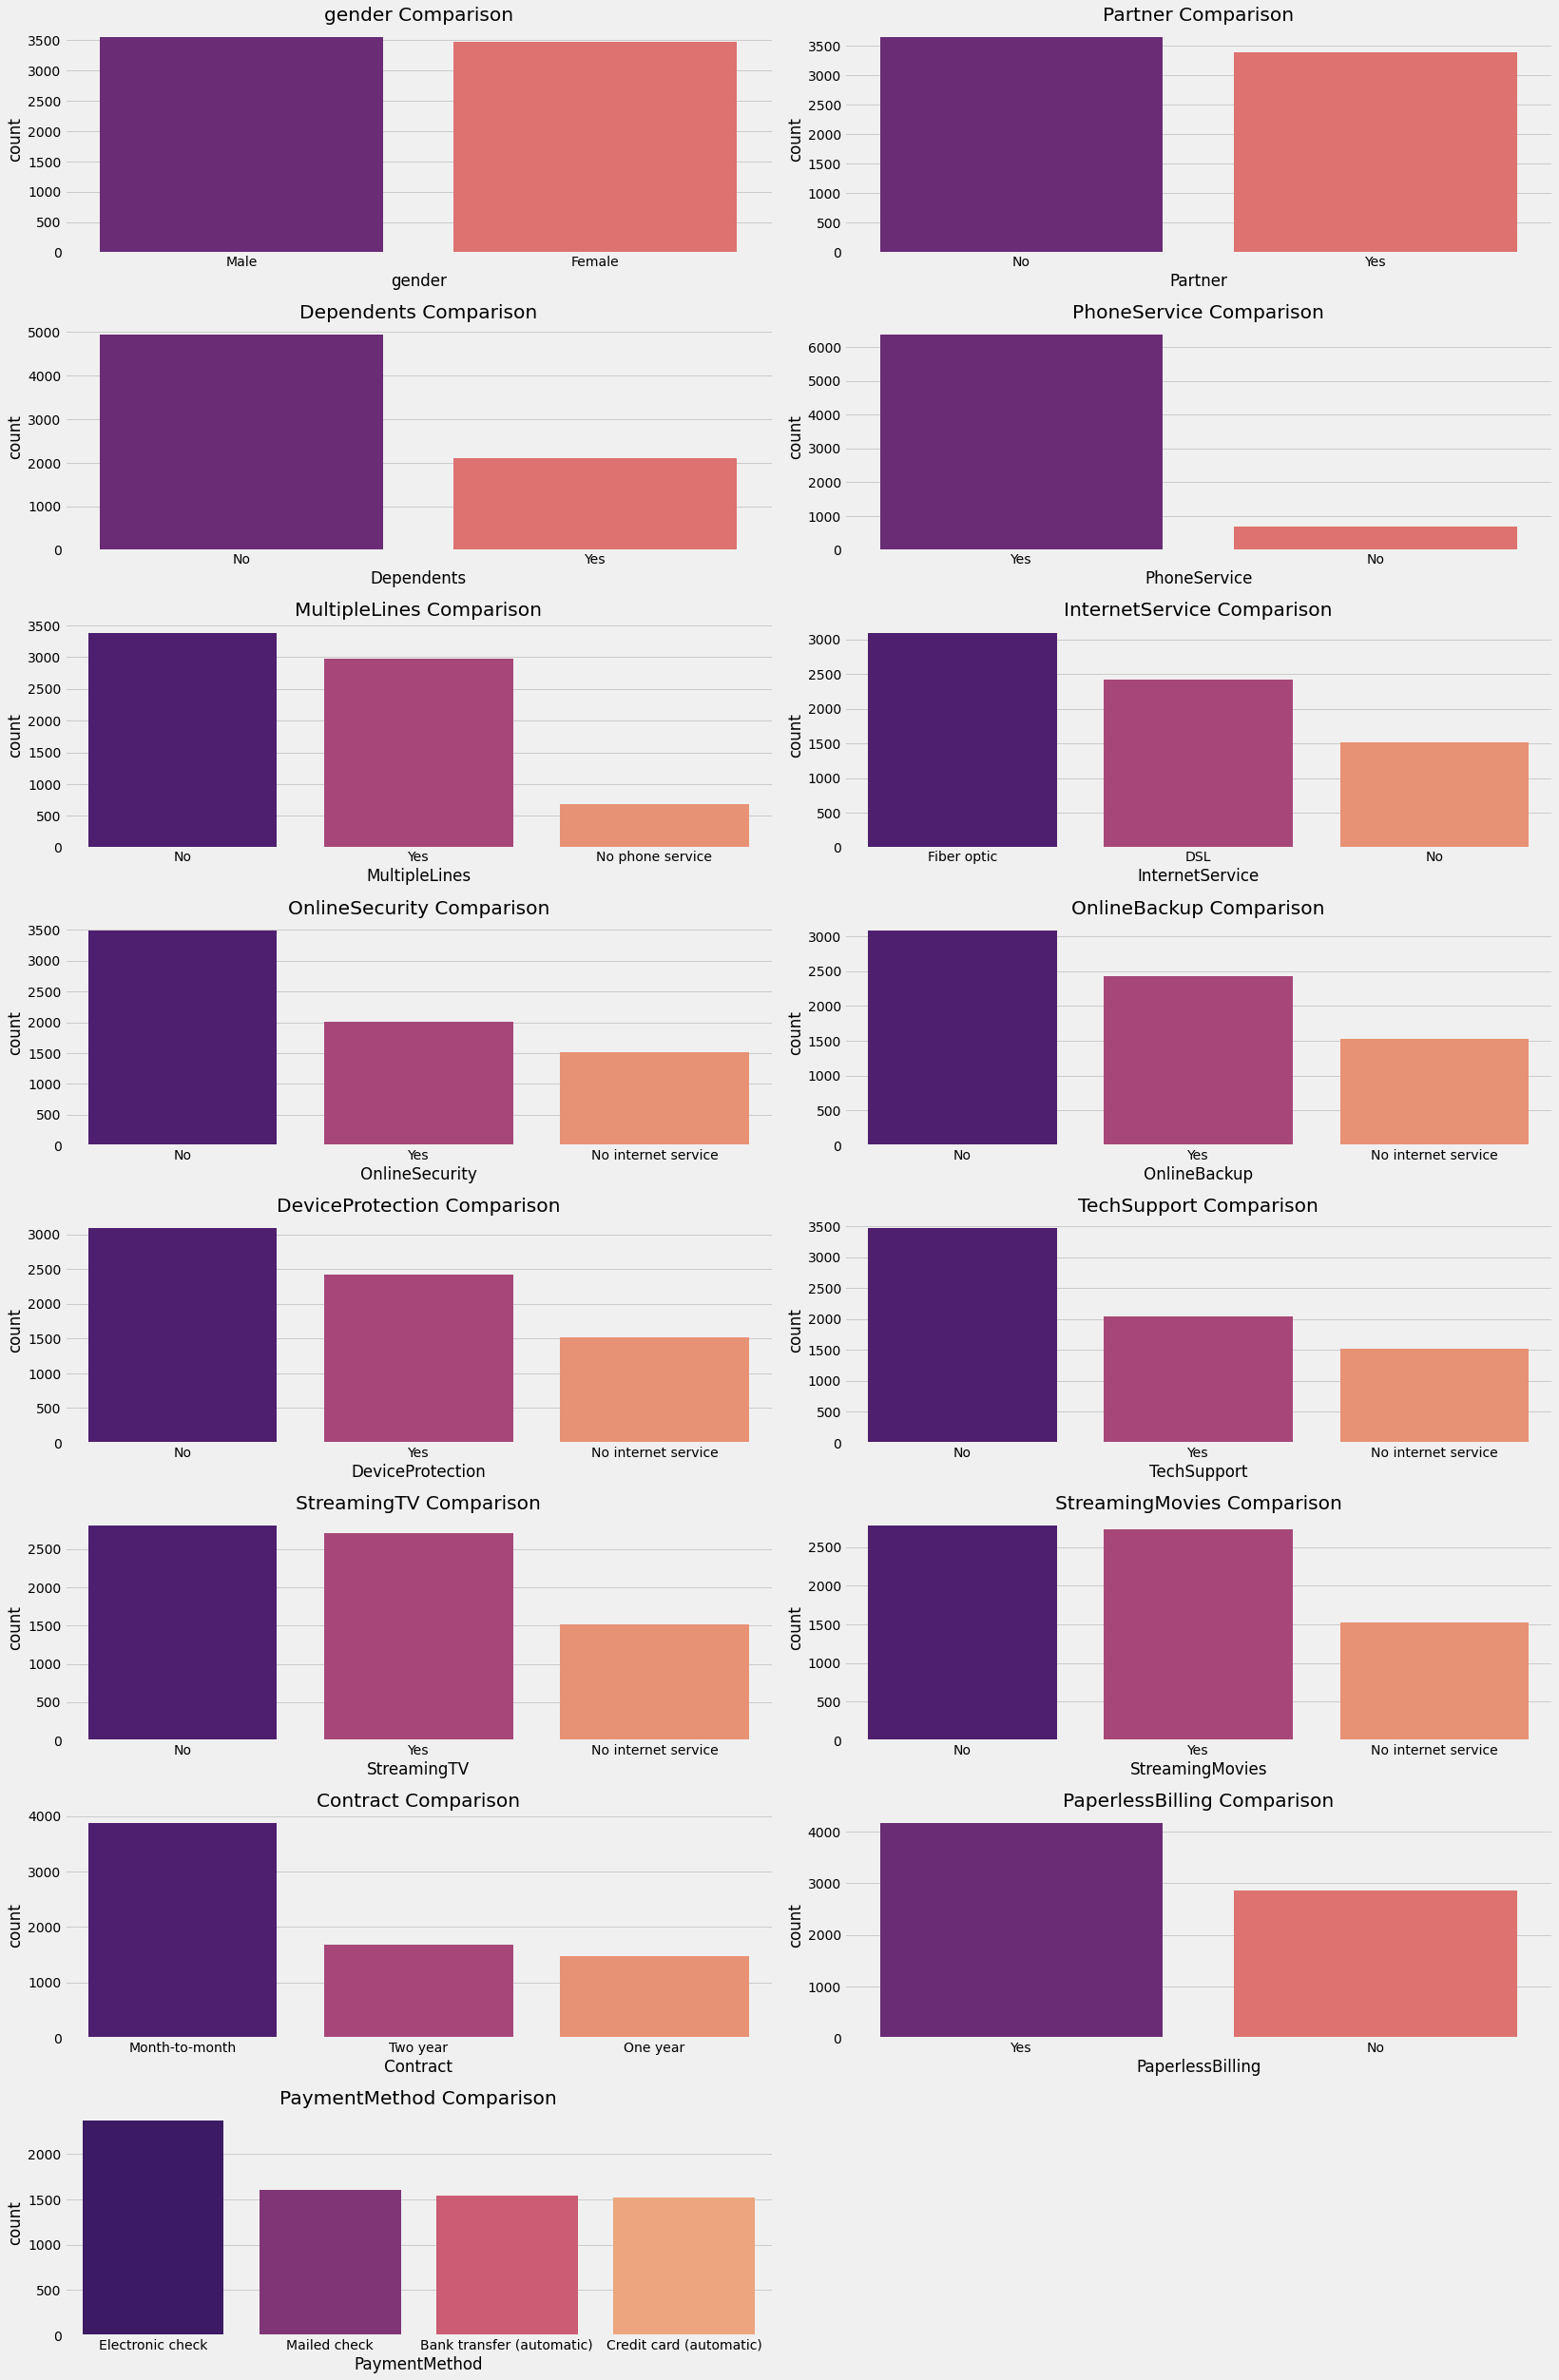

In [40]:
plt.figure(figsize = (23, 35))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = dtc[cat_column[i]],
        order = dtc[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " Comparison", fontweight = 20)

plt.tight_layout()
plt.show()

**Setelah dipisahkan berdasarkan kolom "Churn" dengan kategori "Yes", rata-rata customer kategori tersebut adalah masyarakat non-senior dengan service yang digunakan hanya Phone, Internet service dan Streaming TV and movies dengan metode pembayaran elektronik.**

**Distribusi tabel dengan target**

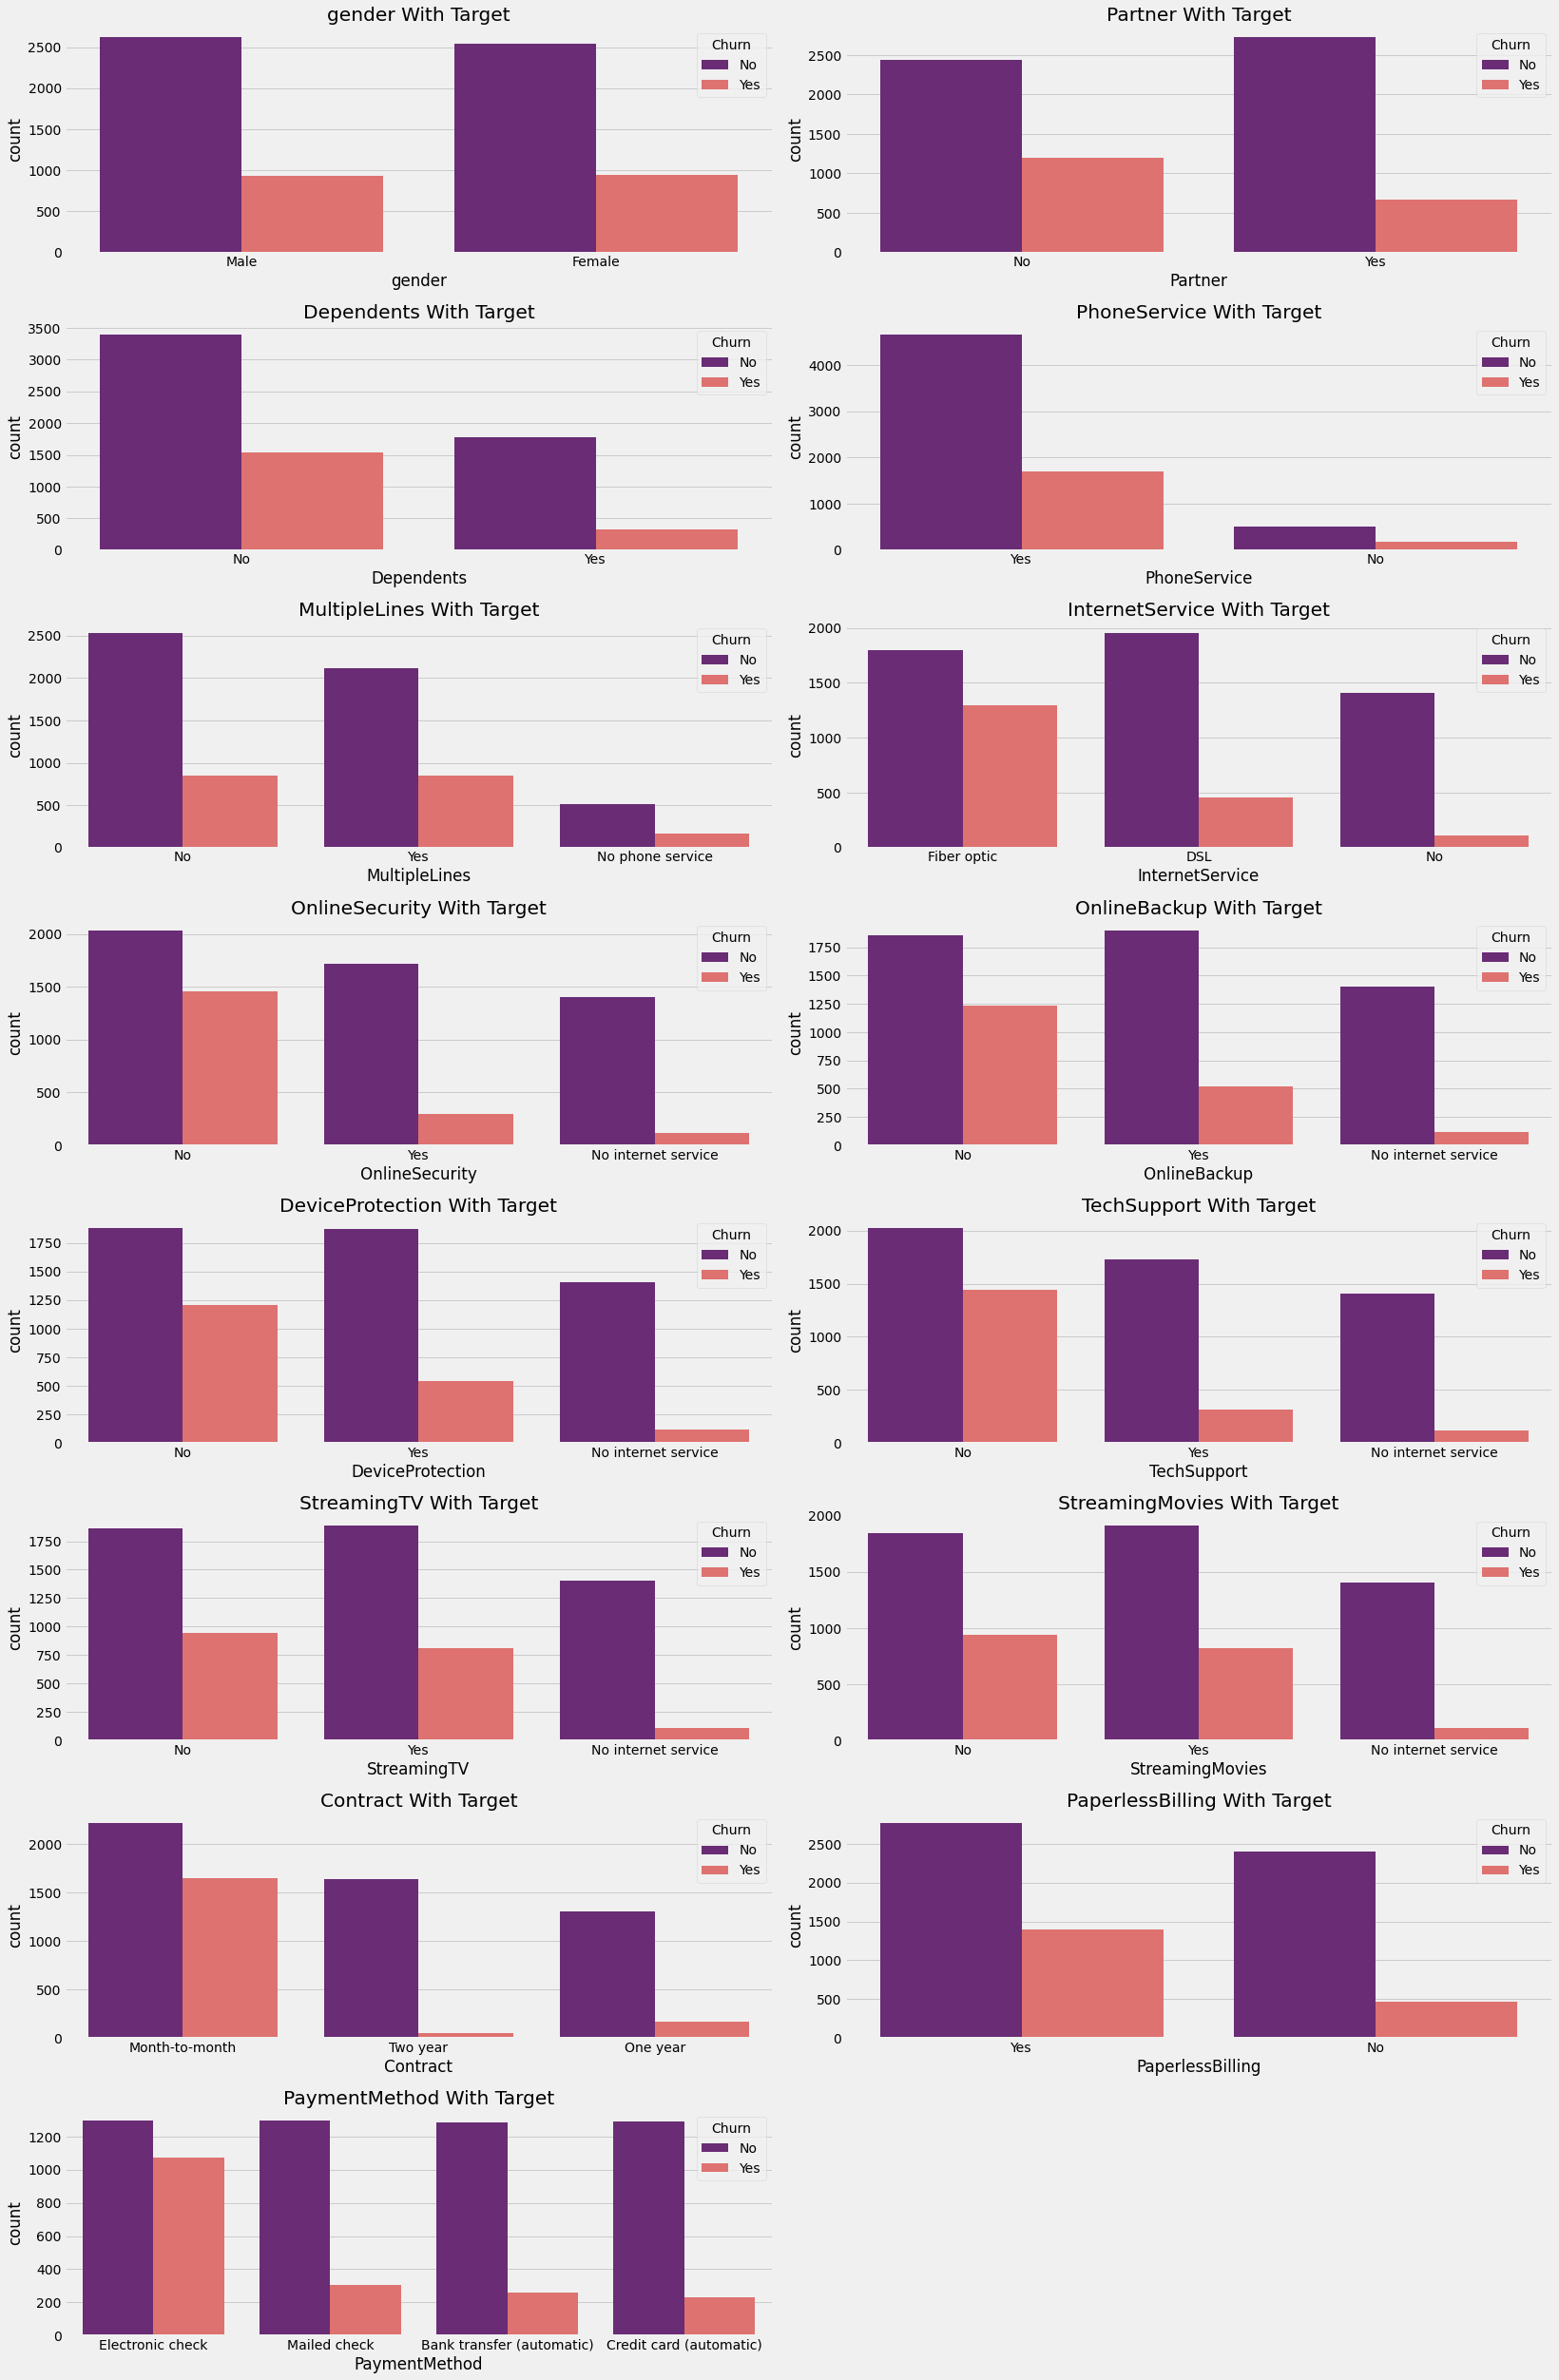

In [41]:
plt.figure(figsize = (23, 35))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = dtc[cat_column[i]],
        hue = dtc["Churn"],
        order = dtc[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " With Target", fontweight = 20)

plt.tight_layout()
plt.show()

**Berdasarkan hal-hal di atas dapat diasumsikan bahwa customer kategori ini adalah customer yang hanya ingin coba-coba layanan saja dari perusahaan Telco ini, karena jika dilihat dari tenure pun, mayoritas pemakaian hanya 1 bulan dengan mengambil jangka waktu langganan perbulan (month-to-month).**

## **STEP 7 : DATA PREPROCESSING**

In [42]:
dtp = dtc.copy()

### **Features Encoding**

####**Gender column**

In [43]:
# Gender
Gender_dummies = pd.get_dummies(dtp['gender'], prefix = 'Gender')
dtp = pd.concat([dtp, Gender_dummies], axis = 1)

In [44]:
dtp.loc[:,dtp.columns.str.contains('Gender')].head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


####**Partner column**

In [45]:
# Partner
Partner_dummies = pd.get_dummies(dtp['Partner'], prefix = 'Partner')
dtp = pd.concat([dtp, Partner_dummies], axis = 1)

In [46]:
dtp.loc[:,dtp.columns.str.contains('Partner')].head()

,Partner,Partner_No,Partner_Yes
0,Yes,0,1
1,No,1,0
2,No,1,0
3,No,1,0
4,No,1,0


####**Dependents column**

In [47]:
# Dependents
Dependents_dummies = pd.get_dummies(dtp['Dependents'], prefix = 'Dependents')
dtp = pd.concat([dtp, Dependents_dummies], axis = 1)

In [48]:
dtp.loc[:,dtp.columns.str.contains('Dependents')].head()

,Dependents,Dependents_No,Dependents_Yes
0,No,1,0
1,No,1,0
2,No,1,0
3,No,1,0
4,No,1,0


####**PhoneService column**

In [49]:
# PhoneService
PhoneService_dummies = pd.get_dummies(dtp['PhoneService'], prefix = 'PhoneService')
dtp = pd.concat([dtp, PhoneService_dummies], axis = 1)

In [50]:
dtp.loc[:,dtp.columns.str.contains('PhoneService')].head()

,PhoneService,PhoneService_No,PhoneService_Yes
0,No,1,0
1,Yes,0,1
2,Yes,0,1
3,No,1,0
4,Yes,0,1


####**MultipleLines column**

In [51]:
# MultipleLines
MultipleLines_dummies = pd.get_dummies(dtp['MultipleLines'], prefix = 'MultipleLines')
dtp = pd.concat([dtp, MultipleLines_dummies], axis = 1)

In [52]:
dtp.loc[:,dtp.columns.str.contains('MultipleLines')].head()

,MultipleLines,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,No phone service,0,1,0
1,No,1,0,0
2,No,1,0,0
3,No phone service,0,1,0
4,No,1,0,0


####**InternetService column**

In [53]:
# InternetService
InternetService_dummies = pd.get_dummies(dtp['InternetService'], prefix = 'InternetService')
dtp = pd.concat([dtp, InternetService_dummies], axis = 1)

In [54]:
dtp.loc[:,dtp.columns.str.contains('InternetService')].head()

,InternetService,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,DSL,1,0,0
1,DSL,1,0,0
2,DSL,1,0,0
3,DSL,1,0,0
4,Fiber optic,0,1,0


####**OnlineSecurity column**

In [55]:
# OnlineSecurity
OnlineSecurity_dummies = pd.get_dummies(dtp['OnlineSecurity'], prefix = 'OnlineSecurity')
dtp = pd.concat([dtp, OnlineSecurity_dummies], axis = 1)

In [56]:
dtp.loc[:,dtp.columns.str.contains('OnlineSecurity')].head()

,OnlineSecurity,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,No,1,0,0
1,Yes,0,0,1
2,Yes,0,0,1
3,Yes,0,0,1
4,No,1,0,0


####**OnlineBackup column**

In [57]:
# OnlineBackup
OnlineBackup_dummies = pd.get_dummies(dtp['OnlineBackup'], prefix = 'OnlineBackup')
dtp = pd.concat([dtp, OnlineBackup_dummies], axis = 1)

In [58]:
dtp.loc[:,dtp.columns.str.contains('OnlineBackup')].head()

,OnlineBackup,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,Yes,0,0,1
1,No,1,0,0
2,Yes,0,0,1
3,No,1,0,0
4,No,1,0,0


####**DeviceProtection column**

In [59]:
# DeviceProtection
DeviceProtection_dummies = pd.get_dummies(dtp['DeviceProtection'], prefix = 'DeviceProtection')
dtp = pd.concat([dtp, DeviceProtection_dummies], axis = 1)

In [60]:
dtp.loc[:,dtp.columns.str.contains('DeviceProtection')].head()

,DeviceProtection,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,No,1,0,0
1,Yes,0,0,1
2,No,1,0,0
3,Yes,0,0,1
4,No,1,0,0


####**TechSupport column**

In [61]:
# TechSupport
TechSupport_dummies = pd.get_dummies(dtp['TechSupport'], prefix = 'TechSupport')
dtp = pd.concat([dtp, TechSupport_dummies], axis = 1)

In [62]:
dtp.loc[:,dtp.columns.str.contains('TechSupport')].head()

,TechSupport,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,No,1,0,0
1,No,1,0,0
2,No,1,0,0
3,Yes,0,0,1
4,No,1,0,0


####**StreamingTV column**

In [63]:
# StreamingTV
StreamingTV_dummies = pd.get_dummies(dtp['StreamingTV'], prefix = 'StreamingTV')
dtp = pd.concat([dtp, StreamingTV_dummies], axis = 1)

In [64]:
dtp.loc[:,dtp.columns.str.contains('StreamingTV')].head()

,StreamingTV,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,No,1,0,0
1,No,1,0,0
2,No,1,0,0
3,No,1,0,0
4,No,1,0,0


####**StreamingMovies column**

In [65]:
# StreamingMovies
StreamingMovies_dummies = pd.get_dummies(dtp['StreamingMovies'], prefix = 'StreamingMovies')
dtp = pd.concat([dtp, StreamingMovies_dummies], axis = 1)

In [66]:
dtp.loc[:,dtp.columns.str.contains('StreamingMovies')].head()

,StreamingMovies,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,No,1,0,0
1,No,1,0,0
2,No,1,0,0
3,No,1,0,0
4,No,1,0,0


####**Contract column**

In [67]:
# Contract
Contract_dummies = pd.get_dummies(dtp['Contract'], prefix = 'Contract')
dtp = pd.concat([dtp, Contract_dummies], axis = 1)

In [68]:
dtp.loc[:,dtp.columns.str.contains('Contract')].head()

,Contract,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Month-to-month,1,0,0
1,One year,0,1,0
2,Month-to-month,1,0,0
3,One year,0,1,0
4,Month-to-month,1,0,0


####**PaperlessBilling column**

In [69]:
# PaperlessBilling
PaperlessBilling_dummies = pd.get_dummies(dtp['PaperlessBilling'], prefix = 'PaperlessBilling')
dtp = pd.concat([dtp, PaperlessBilling_dummies], axis = 1)

In [70]:
dtp.loc[:,dtp.columns.str.contains('PaperlessBilling')].head()

,PaperlessBilling,PaperlessBilling_No,PaperlessBilling_Yes
0,Yes,0,1
1,No,1,0
2,Yes,0,1
3,No,1,0
4,Yes,0,1


####**PaymentMethod column**

In [71]:
# PaymentMethod
PaymentMethod_dummies = pd.get_dummies(dtp['PaymentMethod'], prefix = 'PaymentMethod')
dtp = pd.concat([dtp, PaymentMethod_dummies], axis = 1)

In [72]:
dtp.loc[:,dtp.columns.str.contains('PaymentMethod')].head()

,PaymentMethod,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Electronic check,0,0,1,0
1,Mailed check,0,0,0,1
2,Mailed check,0,0,0,1
3,Bank transfer (automatic),1,0,0,0
4,Electronic check,0,0,1,0


### **Target Encoding**

In [73]:
le = LabelEncoder()
dtp['Churn'] = le.fit_transform(dtp['Churn'])

In [74]:
dtp.drop(columns = cat_column, inplace = True)

In [75]:
dtp.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [76]:
dtp.shape

(7032, 46)

### **Split dataset to features (X) dan target (y)**

In [77]:
X = dtp.drop(columns = ["Churn"])
y = dtp["Churn"]

In [78]:
X.shape

(7032, 45)

In [79]:
y.shape

(7032,)

#### **Split Dataset**

In [80]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 77)

In [81]:
X_train_full.shape, y_train_full.shape

((4922, 45), (4922,))

In [82]:
X_test.shape, y_test.shape

((2110, 45), (2110,))

In [83]:
y_train_full.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

#### **Scalling with pipeline**

In [84]:
# using pipeline
scaler_pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])

In [85]:
scaler_pipeline.fit(X_train_full)

X_train_full = scaler_pipeline.transform(X_train_full)
X_test_trf = scaler_pipeline.transform(X_test)

#### **Use SMOTE to upsampling training set**

In [86]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_full, y_train_full = oversample.fit_resample(X_train_full, y_train_full)

In [87]:
print(X_train_full.shape)
print(y_train_full.shape)
print(y_train_full.value_counts())

(7228, 45)
(7228,)
1    3614
0    3614
Name: Churn, dtype: int64


#### **Split Dataset again to get X_train and X_val**

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.3, random_state = 77)

In [89]:
X_train.shape, X_train.shape[1:]

((5059, 45), (45,))

## **STEP 8 : DEFINE MODEL**

### **ANN Sequential**

In [90]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [91]:
# Base hyperparameters
model = keras.models.Sequential([
    keras.layers.Dense(45, input_shape=(45,)),
    
    keras.layers.Dense(30, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(20, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(10, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(1, activation="sigmoid")
])

**Disini saya membuat model ANN sequential dengan:**

* **1 input layer (Dendrite).**

* **3 hidden layer dengan masing neuron 30,20 dan 10, initializer = glorot_uniform, activation = relu (Nucleus).**

* **1 output layer, dengan 1 neuron dan activation = sigmoid. Karena sigmoid nilainya dari 0-1 dan target dataset ini adalah klasifikasi binary (Axon).**

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                2070      
                                                                 
 dense_1 (Dense)             (None, 30)                1380      
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                        

In [93]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [94]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
159/159 [==============================] - 6s 11ms/step - loss: 0.5581 - accuracy: 0.7134 - val_loss: 0.5091 - val_accuracy: 0.7746
Epoch 2/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4952 - accuracy: 0.7614 - val_loss: 0.4654 - val_accuracy: 0.7925
Epoch 3/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4782 - accuracy: 0.7691 - val_loss: 0.4526 - val_accuracy: 0.7911
Epoch 4/50
159/159 [==============================] - 1s 9ms/step - loss: 0.4662 - accuracy: 0.7762 - val_loss: 0.4571 - val_accuracy: 0.7902
Epoch 5/50
159/159 [==============================] - 1s 9ms/step - loss: 0.4595 - accuracy: 0.7786 - val_loss: 0.4538 - val_accuracy: 0.7865
Epoch 6/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4531 - accuracy: 0.7875 - val_loss: 0.4462 - val_accuracy: 0.7884
Epoch 7/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4552 - accuracy: 0.7847 - val_loss: 0.4509 - val_accuracy: 0.7925
Epoch

#### **Plot history**

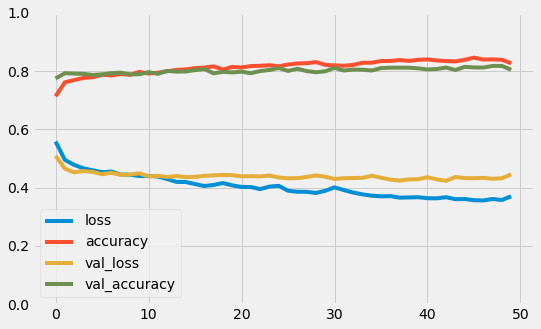

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Dari 50x epoch model, dapat terlihat bahwa akurasi training set model semakin naik seiring berjalannya epoch. Akurasi dari validation set pun juga semakin naik seiring waktu walaupun tidak begitu sama persis dengan training set.**

**Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah.**

In [96]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 1s 4ms/step - loss: 834.8291 - accuracy: 0.7341


[834.8291015625, 0.7341232299804688]

#### **Model Inference**

In [97]:
y_pred = model.predict(X_test_trf)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.05671215]
 [0.05218762]
 [0.02546159]
 [0.00948186]
 [0.14609022]]

 y_test: 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64


In [98]:
predictions = []
for element in y_pred:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[:5])

[0, 0, 0, 0, 0]


In [99]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction":predictions
})
pred_result_log.head(10)

,Actual Target,Prediction
6359,0,0
5926,0,0
4743,0,0
4496,0,0
4569,1,0
4039,0,1
4558,1,1
6878,1,1
5522,1,1
4695,0,0


In [100]:
pred_result_log['Prediction'].value_counts()

0    1342
1     768
Name: Prediction, dtype: int64

#### **Evaluation**

In [101]:
print(f"ACCURACY SCORE : {accuracy_score(y_test, predictions):.4f}\n")
print(f"F1 SCORE       : {f1_score(y_test, predictions):.4f}\n")
print(f"ROC_AUC SCORE  : {roc_auc_score(y_test, predictions):.4f}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predictions)}")

ACCURACY SCORE : 0.7408

F1 SCORE       : 0.5884

ROC_AUC SCORE  : 0.7268

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1549
           1       0.51      0.70      0.59       561

    accuracy                           0.74      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.74      0.75      2110



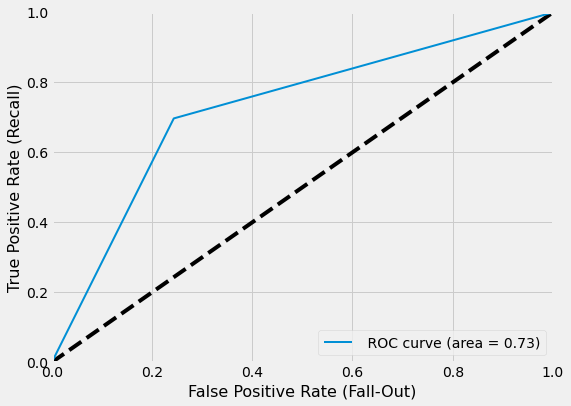

In [102]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

# y_scores = model.decision_function(X_test_trf) # error if including this row
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

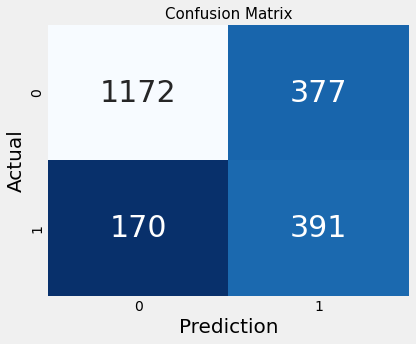

In [103]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predictions),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

**Dari hasil Classification Report, nilai akurasi yang didapat adalah :**
* **ACCURACY SCORE : 0.7322**
* **ROC_AUC SCORE  : 0.7278**

**Nilai ini dirasa cukup bagus untuk base score. Namun jika dilihat dari Confusion Matrix dan precision recallnya terhadap 1 (Churn = "Yes"), hasil yang didapat tidak bagus. Nilai F1 scorenya pun begitu rendah. Model hanya mampu memprediksi customer yang tetap berlangganan saja. Model dirasa belum mampu memprediksi apakah customer akan churn atau berhenti berlangganan atau tidak.**

#### **Model Improvement (Hyperparameter Tuning)**

In [104]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [105]:
def build_model(n_hidden=2, n_neurons=40, input_shape=[45]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [106]:
model_cv = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [107]:
model_cv.fit(X_train, y_train, epochs=100,
             validation_data=(X_val, y_val),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
159/159 [==============================] - 2s 7ms/step - loss: 0.6267 - accuracy: 0.7254 - val_loss: 0.5050 - val_accuracy: 0.7699
Epoch 2/100
159/159 [==============================] - 1s 6ms/step - loss: 0.5068 - accuracy: 0.7632 - val_loss: 0.5121 - val_accuracy: 0.7810
Epoch 3/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4952 - accuracy: 0.7709 - val_loss: 0.4981 - val_accuracy: 0.7838
Epoch 4/100
159/159 [==============================] - 1s 7ms/step - loss: 0.4867 - accuracy: 0.7751 - val_loss: 0.4972 - val_accuracy: 0.7879
Epoch 5/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4710 - accuracy: 0.7756 - val_loss: 0.5237 - val_accuracy: 0.7884
Epoch 6/100
159/159 [==============================] - 1s 7ms/step - loss: 0.4950 - accuracy: 0.7681 - val_loss: 0.5174 - val_accuracy: 0.7746
Epoch 7/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4690 - accuracy: 0.7745 - val_loss: 0.5045 - val_accuracy: 0.7907

In [108]:
import warnings
warnings.filterwarnings('ignore')

param_distribs = {
    "n_hidden": [2, 3, 4],
    "n_neurons": [40, 30, 20]
}

grid_cv = GridSearchCV(model_cv, param_distribs, cv=5, verbose=2, n_jobs=-1)
grid_cv.fit(X_train, y_train, epochs=100,
            validation_data=(X_val, y_val),
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Epoch 1/100
159/159 [==============================] - 2s 7ms/step - loss: 0.6333 - accuracy: 0.7150 - val_loss: 0.5608 - val_accuracy: 0.7658
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5527 - accuracy: 0.7579 - val_loss: 0.5500 - val_accuracy: 0.7718
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5376 - accuracy: 0.7654 - val_loss: 0.5371 - val_accuracy: 0.7833
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5138 - accuracy: 0.7709 - val_loss: 0.5459 - val_accuracy: 0.7787
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5021 - accuracy: 0.7764 - val_loss: 0.5236 - val_accuracy: 0.7870
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5030 - accuracy: 0.7778 - val_loss: 0.5806 - val_accuracy: 0.7856
Epoch 7/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4890 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6f40312250>,
             n_jobs=-1,
             param_grid={'n_hidden': [2, 3, 4], 'n_neurons': [40, 30, 20]},
             verbose=2)

In [109]:
print('Grid Search Best score : ', grid_cv.best_score_)
print('Grid Search Best Parameters : ', grid_cv.best_params_)

Grid Search Best score :  0.7762431502342224
Grid Search Best Parameters :  {'n_hidden': 2, 'n_neurons': 40}


In [110]:
grid_cv.score(X_test, y_test)

66/66 [==============================] - 0s 4ms/step - loss: 4.1011 - accuracy: 0.7341


0.7341232299804688

In [111]:
grid_cv.best_estimator_

In [112]:
# Hasil evaluasi model dari gridCV
model_gridCV = grid_cv.best_estimator_.model

model_gridCV.evaluate(X_test, y_test)

66/66 [==============================] - 0s 4ms/step - loss: 4.1011 - accuracy: 0.7341


[4.10113525390625, 0.7341232299804688]

#### **Model Inference (Hasil GridSearchCV)**

In [113]:
pred_grid = model_gridCV.predict(X_test_trf)
print('Predict result : \n', pred_grid[:5])
print('\n')
print('y_test : \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result : 
 [[ 0.13495053]
 [ 0.5733944 ]
 [-0.10788003]
 [-0.0309228 ]
 [ 0.39115474]]


y_test : 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64

 [0, 1, 0, 0, 0]


#### **Evaluation (Hasil GridSearchCV)**

In [114]:
print(f"ACCURACY SCORE  : {accuracy_score(y_test, predict_grid):.4f}\n")
print(f"F1 SCORE        : {f1_score(y_test, predict_grid):.4f}\n")
print(f"ROC_AUC SCORE   : {roc_auc_score(y_test, predict_grid):.4f}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

ACCURACY SCORE  : 0.7701

F1 SCORE        : 0.6362

ROC_AUC SCORE   : 0.7656

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1549
           1       0.55      0.76      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.80      0.77      0.78      2110



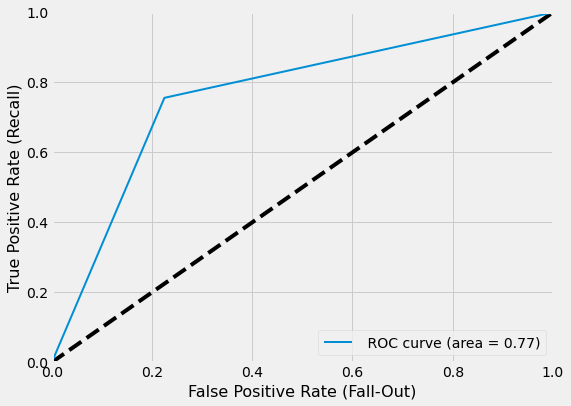

In [115]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, predict_grid)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

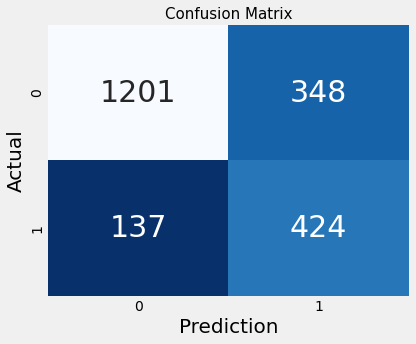

In [116]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predict_grid),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

**Dari hasil Hyperparameter Tuning menggunakan GridSearchCV, best parameters yang didapatkan adalah `{'n_hidden': 2, 'n_neurons': 40}` atau 2 hidden layer dan 40 neuron pada tiap layernya.**

**Untuk Skor Akurasi, F1 dan ROC ketiganya mendapatkan kenaikan skor dari skor sebelumnnya dan hasilnya pun bisa dibilang cukup bagus.**

#### **Model Saving**

In [117]:
model_gridCV.save("gridcv_model.h5")

### **ANN Functional**

In [118]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [119]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)

model_func = keras.models.Model(inputs=[input_], outputs=[output])

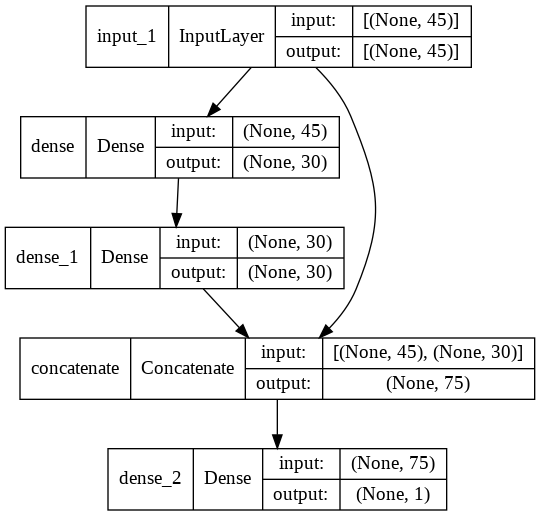

In [120]:
keras.utils.plot_model(model_func,"ANN_Functional_model.png", show_shapes=True)

In [121]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           1380        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 75)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [122]:
model_func.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [123]:
%time history = model_func.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
159/159 [==============================] - 2s 6ms/step - loss: 0.5678 - accuracy: 0.7021 - val_loss: 0.4799 - val_accuracy: 0.7755
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4880 - accuracy: 0.7636 - val_loss: 0.4706 - val_accuracy: 0.7819
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4796 - accuracy: 0.7675 - val_loss: 0.4744 - val_accuracy: 0.7792
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4740 - accuracy: 0.7717 - val_loss: 0.4574 - val_accuracy: 0.7879
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4701 - accuracy: 0.7715 - val_loss: 0.4576 - val_accuracy: 0.7888
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4647 - accuracy: 0.7784 - val_loss: 0.4513 - val_accuracy: 0.7893
Epoch 7/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4597 - accuracy: 0.7778 - val_loss: 0.4502 - val_accuracy: 0.7898

#### **Plot history model functional**

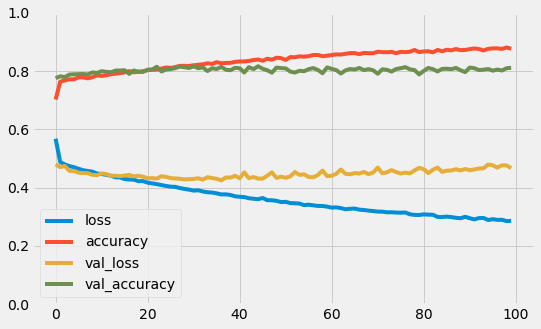

In [124]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

**Dari hasil plot epoch model diatas dapat dilihat bahwa model cukup baik dalam memprediksi dataset ini. Terlihat dari semakin banyaknya epoch, semakin turun loss training setnya dan semakin naik akurasinya. Untuk validation set sendiri juga gapnya tidak terlalu jauh untuk keduanya.**

In [125]:
model_func.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.7379


[0.6285123825073242, 0.7379146814346313]

#### **Model Inference**

In [126]:
pred = model_func.predict(X_test_trf)
print('Predict result : \n', pred[:5])
print('\n')
print('y_test : \n', y_test[:5])

Predict result : 
 [[0.00093723]
 [0.03804669]
 [0.00235386]
 [0.00574799]
 [0.27966884]]


y_test : 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64


In [127]:
pred_funct = []
for element in pred:
    if element > 0.5:
        pred_funct.append(1)
    else:
        pred_funct.append(0)

print(pred_funct[:5])

[0, 0, 0, 0, 0]


In [128]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction":pred_funct
})
pred_result_log.head(10)

,Actual Target,Prediction
6359,0,0
5926,0,0
4743,0,0
4496,0,0
4569,1,0
4039,0,1
4558,1,1
6878,1,1
5522,1,1
4695,0,0


#### **Evaluation**

In [129]:
print(f"ACCURACY SCORE  : {accuracy_score(y_test, pred_funct):.4f}\n")
print(f"F1 SCORE        : {f1_score(y_test, pred_funct):.4f}\n")
print(f"ROC_AUC SCORE   : {roc_auc_score(y_test, pred_funct):.4f}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, pred_funct)}")

ACCURACY SCORE  : 0.7379

F1 SCORE        : 0.5864

ROC_AUC SCORE   : 0.7254

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1549
           1       0.51      0.70      0.59       561

    accuracy                           0.74      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.74      0.75      2110



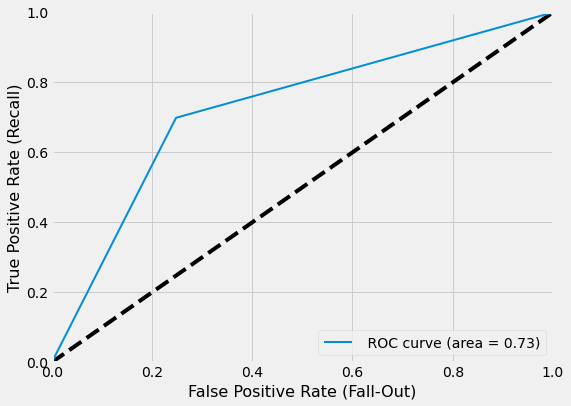

In [130]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, pred_funct)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

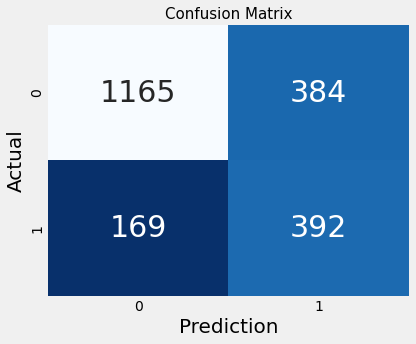

In [131]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, pred_funct),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

**Hasil evaluasi dari classification report dan confusion matrix menunjukkan hal yang sama. ANN Functional hanya sedikit lebih baik dari ANN Sequential. Kurang lebih hanya naik beberapa poin saja dan tidak terlalu signifikat.**

## **STEP 9 : MODEL IMPROVEMENT**

### **Model Improvement (Hyperparameter Tuning ANN Functional)**

In [132]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [133]:
def build_model_func(optimizer, kernel, units):
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    
    #Hidden Layer
    hidden1 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(input_)
    hidden2 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    
    #Output Layer
    output = keras.layers.Dense(1, activation="sigmoid")(concat)
    
    model_func = keras.models.Model(inputs=[input_], outputs=[output])
    
    model_func.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model_func

In [134]:
model_best_func = keras.wrappers.scikit_learn.KerasClassifier(build_model_func)

In [135]:
parameters = {
    'optimizer':['adam','nadam'],
    'kernel':['random_uniform', 'random_normal'],
    'units':[30,40]
}

grid_cv = GridSearchCV(model_best_func, parameters, cv=5, verbose=2, n_jobs=-1)
%time grid_cv.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/50
159/159 [==============================] - 2s 8ms/step - loss: 0.5449 - accuracy: 0.7268 - val_loss: 0.4675 - val_accuracy: 0.7778
Epoch 2/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4878 - accuracy: 0.7666 - val_loss: 0.4693 - val_accuracy: 0.7815
Epoch 3/50
159/159 [==============================] - 1s 7ms/step - loss: 0.4825 - accuracy: 0.7683 - val_loss: 0.4738 - val_accuracy: 0.7815
Epoch 4/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4797 - accuracy: 0.7689 - val_loss: 0.4580 - val_accuracy: 0.7833
Epoch 5/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 0.7727 - val_loss: 0.4578 - val_accuracy: 0.7852
Epoch 6/50
159/159 [==============================] - 1s 7ms/step - loss: 0.4745 - accuracy: 0.7707 - val_loss: 0.4582 - val_accuracy: 0.7856
Epoch 7/50
159/159 [==============================] - 1s 7ms/step - loss: 0.4710 - accur

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6f47e72f10>,
             n_jobs=-1,
             param_grid={'kernel': ['random_uniform', 'random_normal'],
                         'optimizer': ['adam', 'nadam'], 'units': [30, 40]},
             verbose=2)

In [136]:
print('Grid Search Best score : ', grid_cv.best_score_)
print('Grid Search Best Parameters : ', grid_cv.best_params_)

Grid Search Best score :  0.7782157063484192
Grid Search Best Parameters :  {'kernel': 'random_uniform', 'optimizer': 'nadam', 'units': 40}


In [137]:
grid_cv.score(X_test_trf, y_test)

66/66 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7730


0.7729857563972473

In [138]:
grid_cv.best_estimator_

In [139]:
# Hasil evaluasi model dari gridCV
model_func_gridCV = grid_cv.best_estimator_.model

model_func_gridCV.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7730


[0.47798681259155273, 0.7729857563972473]

### **Model Inference (Hasil GridSearchCV)**

In [140]:
pred_grid = model_func_gridCV.predict(X_test_trf)
print('Predict result: \n', pred_grid[:5])
print('\n')
print('y_test: \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result: 
 [[0.13183822]
 [0.47973353]
 [0.01014212]
 [0.0242656 ]
 [0.5340183 ]]


y_test: 
 6359    0
5926    0
4743    0
4496    0
4569    1
Name: Churn, dtype: int64

 [0, 0, 0, 0, 1]


### **Evaluation (Hasil GridSearchCV)**

In [141]:
print(f"ACCURACY SCORE  : {accuracy_score(y_test, predict_grid):.4f}\n")
print(f"F1 SCORE        : {f1_score(y_test, predict_grid):.4f}\n")
print(f"ROC_AUC SCORE   : {roc_auc_score(y_test, predict_grid):.4f}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

ACCURACY SCORE  : 0.7730

F1 SCORE        : 0.6261

ROC_AUC SCORE   : 0.7544

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1549
           1       0.56      0.71      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110



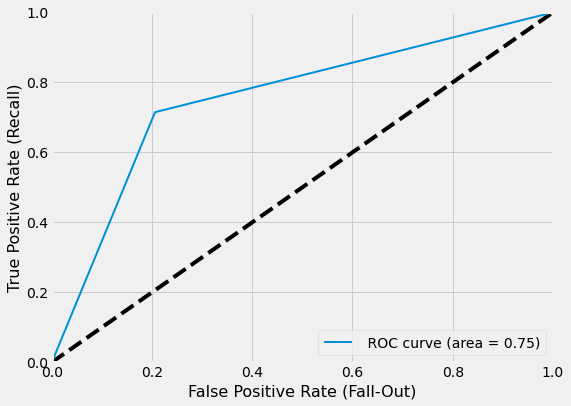

In [142]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, predict_grid)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

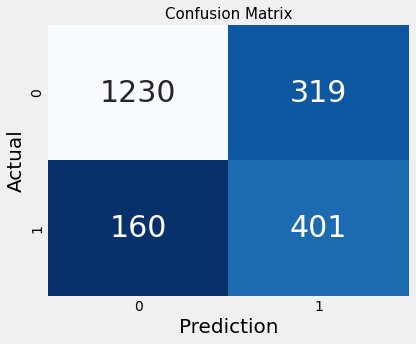

In [143]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predict_grid),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

**Setelah dilakukan pencarian best parameter, best parameter yang didapat adalah:**

* **kernel_initializer = 'random_normal'**
* **optimizer = 'nadam'**
* **units (neuron) = 40**

**Nilai skor yang didapat (Classification report dan ROC_AUC score) naik sekitar 1-2 poin dari hasil base model sebelumnya.**

### **Model Saving**

In [144]:
model_func_gridCV.save("ridcv_model_ANNfunc.h5")

##**STEP 10 : CONCLUSION**

### **EDA Analysis**

* **Distribusi dataset secara keseluruhan. Untuk data numerik, rata-rata berbentuk bimodal dan multimodal distribution. Hanya kolom 'Total Charges' saja yang skewed ke kanan, hal ini wajar karena ada saja customer yang memiliki total tagihan yang tinggi dikarenakan jumlah service yang dipakai cukup banyak atau hal lainnya.**

* **Distribusi kolom chrun atau kolom yang dijadikan target memiliki distribution yang Imbalanced atau tidak seimbang dengan presentase No : 73,4% dan Yes : 26,6%**

* **Sebagian besar pelanggan menggunakan E-check sebagai Payment Method**

* **Rasio gender Female dan Male memiliki distibusi yang seimbang dengan perbandingan 50:50**

* **Pengguna yang memiliki non-dependen sekitar dua kali lebih banyak daripada pengguna yang memiliki tanggungan.**

* **Sebagian besar pengguna bukan senior citizen.**

* **Sebagian besar pengguna lebih memilih kontrak bulanan.**

* **Sebagian besar pengguna lebih suka penagihan paperless**

* **Total biaya jatuh di bawah 4000 untuk sebagian besar pengguna.**

* **Mayoritas churning customer adalah 'Non senior citizen' atau masyarakat dengan umur dibawah 40. Dan mayoritas hanya menggunakan layanan selama 1 bulan.**

* **Rata-rata customer kategori adalah masyarakat non-senior dengan service yang digunakan hanya Phone, Internet service dan Streaming TV and movies dengan metode pembayaran elektronik.**

* **Berdasarkan hal-hal di atas dapat diasumsikan bahwa customer kategori ini adalah customer yang hanya ingin coba-coba layanan saja dari perusahaan Telco ini, karena jika dilihat dari tenure pun, mayoritas pemakaian hanya 1 bulan dengan mengambil jangka waktu langganan perbulan (month-to-month).**

### **Model Analysis**

#### **ANN Sequential**

* **Dari 50x epoch model, dapat terlihat bahwa akurasi training set model semakin naik seiring berjalannya epoch. Akurasi dari validation set pun juga semakin naik seiring waktu walaupun tidak begitu sama persis dengan training set.**

* **Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah.**

* **Dari hasil Classification Report, nilai akurasi yang didapat adalah :**
 * **ACCURACY SCORE : 0.7322**
 * **ROC_AUC SCORE  : 0.7278**

* **Nilai ini dirasa cukup bagus untuk base score. Namun jika dilihat dari Confusion Matrix dan precision recallnya terhadap 1 (Churn = "Yes"), hasil yang didapat tidak bagus. Nilai F1 scorenya pun begitu rendah. Model hanya mampu memprediksi customer yang tetap berlangganan saja. Model dirasa belum mampu memprediksi apakah customer akan churn atau berhenti berlangganan atau tidak.**

* **Dari hasil Hyperparameter Tuning menggunakan GridSearchCV, best parameters yang didapatkan adalah `{'n_hidden': 2, 'n_neurons': 40}` atau 2 hidden layer dan 40 neuron pada tiap layernya. Untuk Skor Akurasi, F1 dan ROC ketiganya mendapatkan kenaikan skor dari skor sebelumnnya dan hasilnya pun bisa dibilang cukup bagus.**

#### **ANN Functional**

* **Dari hasil plot epoch model ANN Functional dapat dilihat bahwa model cukup baik dalam memprediksi dataset ini. Terlihat dari semakin banyaknya epoch, semakin turun loss training setnya dan semakin naik akurasinya. Untuk validation set sendiri juga gapnya tidak terlalu jauh untuk keduanya.**

* **Hasil evaluasi dari classification report dan confusion matrix menunjukkan hal yang sama. ANN Functional hanya sedikit lebih baik dari ANN Sequential. Kurang lebih hanya naik beberapa poin saja dan tidak terlalu signifikat.**

* **Setelah dilakukan pencarian best parameter, best parameter yang didapat adalah:**
 * **kernel_initializer = 'random_normal'**
 * **optimizer = 'nadam'**
 * **units (neuron) = 40**

* **Nilai skor yang didapat (Classification report dan ROC_AUC score) naik sekitar 1-2 poin dari hasil base model sebelumnya.**